In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(65.07263597574851, -177.7121337418267),
 (16.34319609634605, 154.6765226489578),
 (-85.62617548877917, -2.170006947005078),
 (68.39266628865465, 9.99499058725658),
 (-37.593540529090326, -164.7048501655495),
 (-79.37990491752488, 136.37346513508885),
 (-38.76578933722814, -93.21196118508793),
 (-81.36370557651932, -170.30131580515703),
 (-40.594306813828474, 145.05802733310082),
 (-80.20990533282645, 131.68582555315652),
 (-69.26461744227977, -76.48228885374866),
 (-71.54913896784365, 152.5517013777527),
 (-74.52992708551426, 117.00353071183036),
 (66.665875406836, 124.8606068174442),
 (-42.760367120811864, -52.16048911178518),
 (83.97160352457024, -23.494171680136105),
 (-11.161268106222266, 160.7943734984898),
 (-77.18834307267095, -35.9967783288491),
 (56.78500100153647, 176.56794439919713),
 (-10.372007920361483, -164.9010423968288),
 (-27.33639498191578, -33.536246898494454),
 (61.44749690769004, -1.7820661740413186),
 (10.410233904477934, 171.88769084210185),
 (27.8820828150724

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

65.07263597574851 -177.7121337418267
16.34319609634605 154.6765226489578
-85.62617548877917 -2.170006947005078
68.39266628865465 9.99499058725658
-37.593540529090326 -164.7048501655495
-79.37990491752488 136.37346513508885
-38.76578933722814 -93.21196118508793
-81.36370557651932 -170.30131580515703
-40.594306813828474 145.05802733310082
-80.20990533282645 131.68582555315652
-69.26461744227977 -76.48228885374866
-71.54913896784365 152.5517013777527
-74.52992708551426 117.00353071183036
66.665875406836 124.8606068174442
-42.760367120811864 -52.16048911178518
83.97160352457024 -23.494171680136105
-11.161268106222266 160.7943734984898
-77.18834307267095 -35.9967783288491
56.78500100153647 176.56794439919713
-10.372007920361483 -164.9010423968288
-27.33639498191578 -33.536246898494454
61.44749690769004 -1.7820661740413186
10.410233904477934 171.88769084210185
27.882082815072465 -116.24604552269678
10.941637012015534 -80.19933097784907
9.769449585383185 -163.0813600523988
-84.16123060402265 

In [5]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # if i >= 100:
    #     break
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | egvekinot
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | sorland
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | burnie
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | zhigansk
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | kirakira
Processing Record 17 of Set 1 | beringovskiy
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | sao joao da barra
Processing Record 20 of Set 1 | brae
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of 

In [8]:
len(city_data)

571

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Egvekinot,66.3167,-179.1667,-16.44,94,44,3.85,RU,2022-12-08 02:05:37
1,Kavieng,-2.5744,150.7967,83.28,70,100,5.37,PG,2022-12-08 02:05:59
2,Hermanus,-34.4187,19.2345,61.81,89,100,9.66,ZA,2022-12-08 02:05:59
3,Sorland,67.6670,12.6934,37.26,58,97,19.22,NO,2022-12-08 02:05:59
4,Avarua,-21.2078,-159.7750,82.45,74,40,9.22,CK,2022-12-08 02:06:00
5,Hobart,-42.8794,147.3294,55.26,54,75,19.57,AU,2022-12-08 02:02:34
6,Lebu,-37.6167,-73.6500,60.24,98,100,12.17,CL,2022-12-08 02:02:45
7,Vaini,-21.2000,-175.2000,84.36,84,75,4.61,TO,2022-12-08 02:06:00
8,Burnie,-41.0667,145.9167,56.95,41,37,17.54,AU,2022-12-08 02:06:01
9,New Norfolk,-42.7826,147.0587,54.90,50,58,4.00,AU,2022-12-08 02:06:01


In [10]:
new_columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Egvekinot,RU,2022-12-08 02:05:37,66.3167,-179.1667,-16.44,94,44,3.85
1,Kavieng,PG,2022-12-08 02:05:59,-2.5744,150.7967,83.28,70,100,5.37
2,Hermanus,ZA,2022-12-08 02:05:59,-34.4187,19.2345,61.81,89,100,9.66
3,Sorland,NO,2022-12-08 02:05:59,67.6670,12.6934,37.26,58,97,19.22
4,Avarua,CK,2022-12-08 02:06:00,-21.2078,-159.7750,82.45,74,40,9.22
...,...,...,...,...,...,...,...,...,...
566,Nang Rong,TH,2022-12-08 02:21:12,14.6377,102.7914,73.99,75,57,9.53
567,Mutis,CO,2022-12-08 02:21:12,6.2262,-77.4044,75.97,88,11,4.25
568,Citta Di Castello,IT,2022-12-08 02:21:12,43.4691,12.2305,49.26,77,100,2.26
569,Gladstone,AU,2022-12-08 02:21:13,-23.8500,151.2500,94.78,43,10,10.36


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
time.strftime("%x")

'12/07/22'

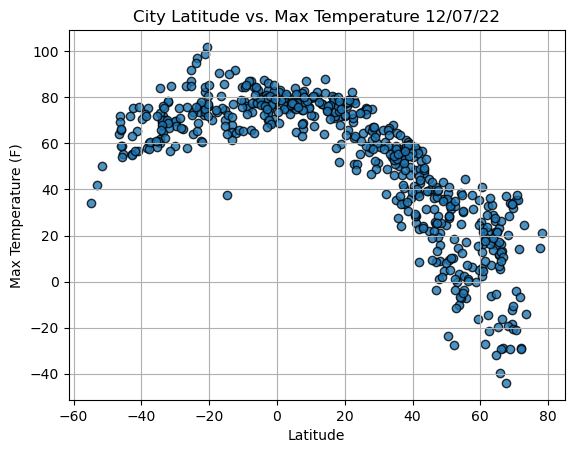

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

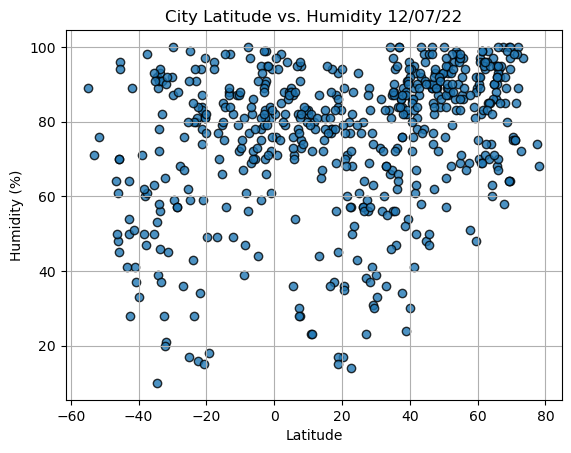

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

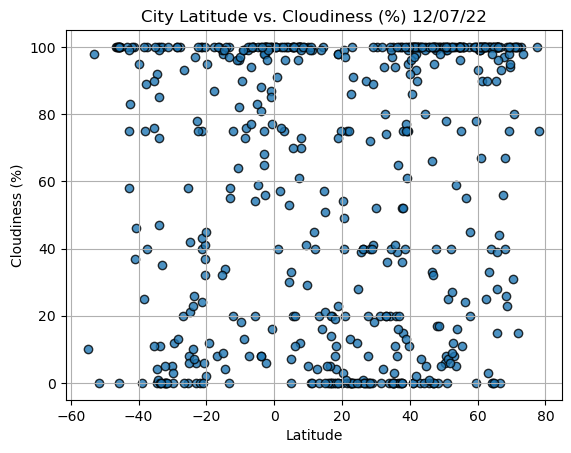

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

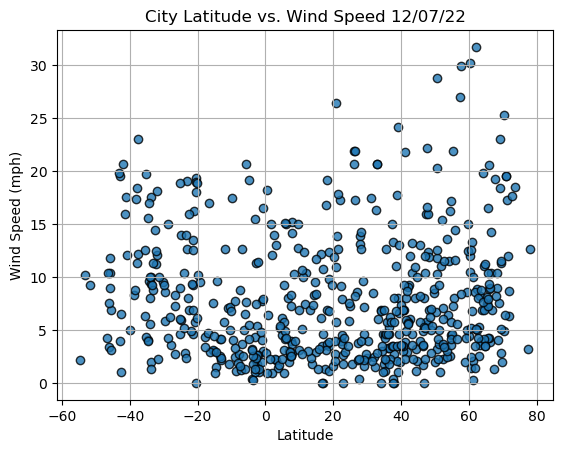

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2022-12-08 02:01:43
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    75.22
Humidity                       60
Cloudiness                     75
Wind Speed                  18.41
Name: 13, dtype: object

In [21]:
# Northern Hemi identification
city_data_df['Lat'] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
566     True
567     True
568     True
569    False
570    False
Name: Lat, Length: 571, dtype: bool

In [22]:
# DataFrame as the same above
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Egvekinot,RU,2022-12-08 02:05:37,66.3167,-179.1667,-16.44,94,44,3.85
3,Sorland,NO,2022-12-08 02:05:59,67.6670,12.6934,37.26,58,97,19.22
11,Albany,US,2022-12-08 02:02:55,42.6001,-73.9662,52.57,87,100,5.99
12,Zhigansk,RU,2022-12-08 02:06:02,66.7697,123.3711,-29.02,95,93,6.87
15,Beringovskiy,RU,2022-12-08 02:06:03,63.0500,179.3167,7.16,85,3,5.30


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

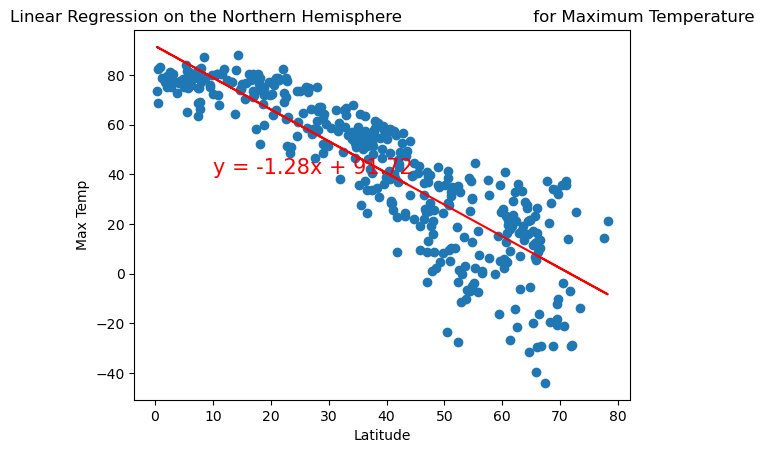

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

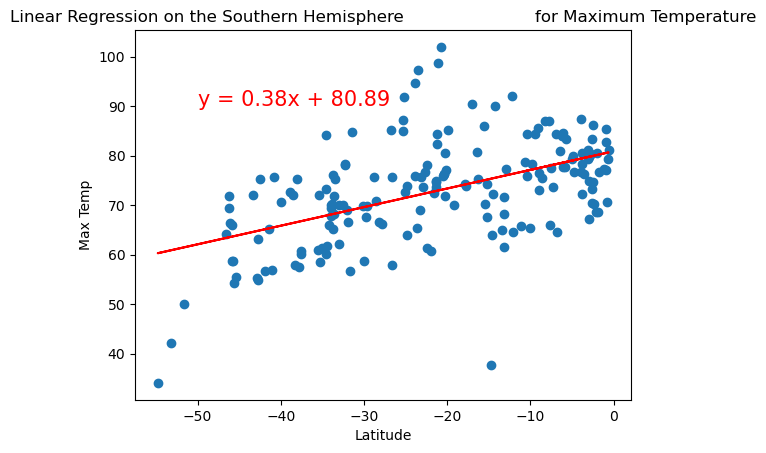

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

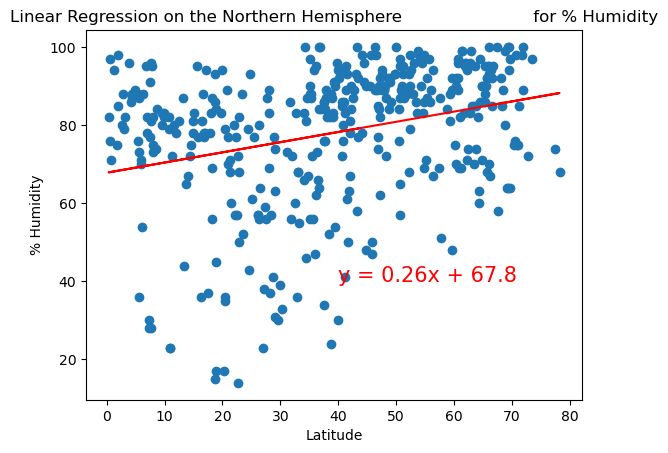

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,40))

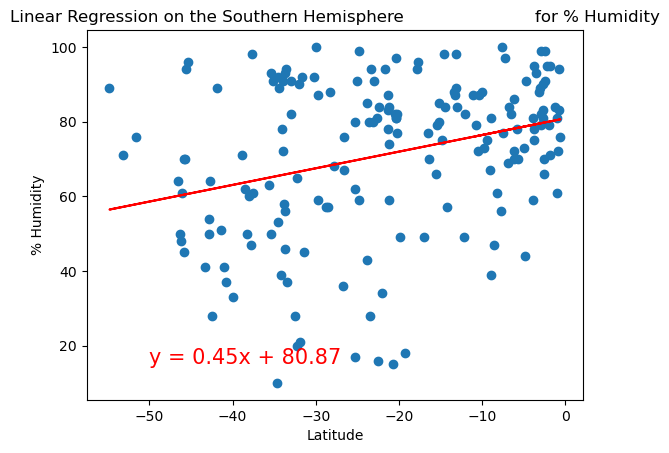

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

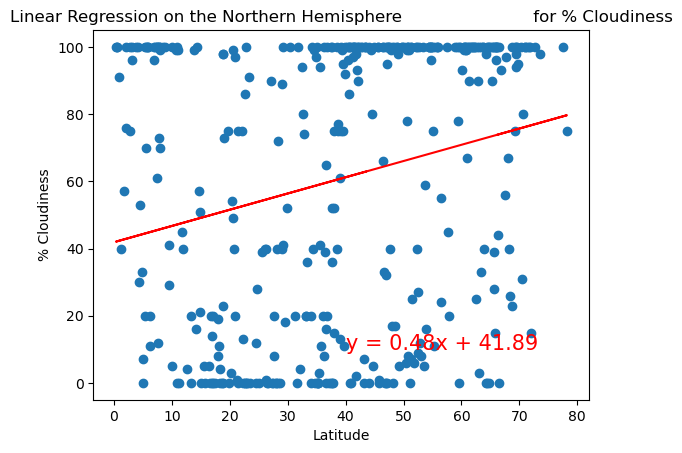

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

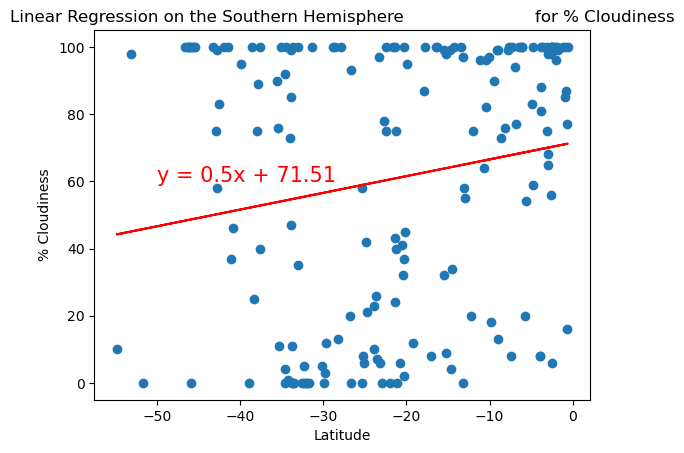

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

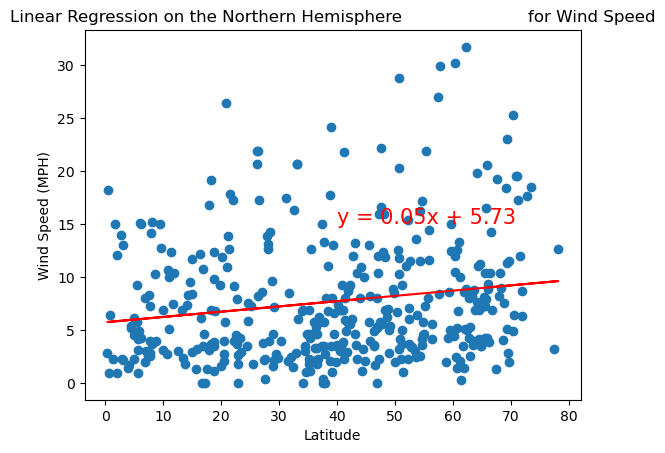

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed (MPH)',(40,15))

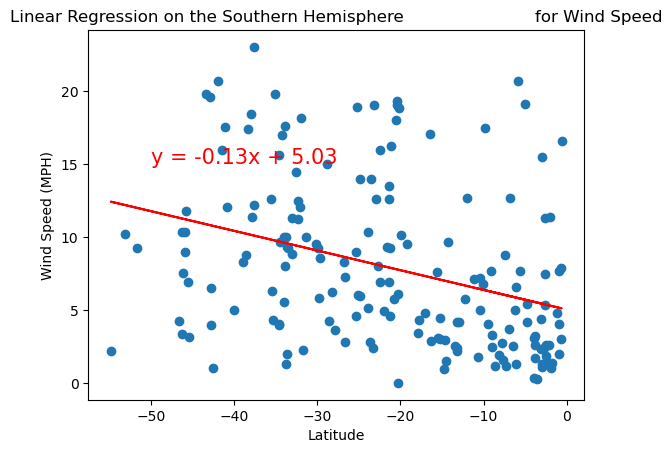

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (MPH)',(-50,15))